In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
import spacy
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from langdetect import detect
from googletrans import Translator
import re
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
from textblob import TextBlob

In [2]:
# import the dataset
import boto3
bucket='SEIS736-bucket' # Or whatever you called your bucket
data_key = 'tweets_fake_real.csv' # Where the file is within your bucket
data_location = 's3://SEIS736-bucket/tweets_fake_real.csv'.format(bucket, data_key)
df_fake_real = pd.read_csv(data_location)

In [23]:
# Checking the first few lines to see its properly loaded and what the dataset looklike 
df_fake_real.head()

In [4]:
# create a seperate dataframe for fake Labeled posts
df_fake= df_fake_real[df_fake_real['label'] == 'fake']

In [22]:
# Basic info of fake Labeled posts
df_fake.info()

In [6]:
# create a seperate dataframe for real Labeled posts
df_real= df_fake_real[df_fake_real['label'] == 'real']

In [21]:
# Basic info of real Labeled posts
df_real.info()

In [33]:
# Defining the dataframe to capture the semantic feature values
fake_statistics = pd.DataFrame(index=['WordCount','Special_char','hyperlinks','Nouns','Verbs','Uppercase'], columns=['value','percentage'])
real_statistics = pd.DataFrame(index=['WordCount','Special_char','hyperlinks','Nouns','Verbs','Uppercase'], columns=['value','percentage'])

In [36]:
# Word Count - number of words per line in fake news
fake_wordCount = pd.DataFrame()
fake_wordCount["Number of Words"] = df_fake['post_text'].apply(lambda n: len(n.split()))
fake_statistics.at['WordCount', 'value']  = int(fake_wordCount['Number of Words'].sum())
fake_statistics.at['WordCount', 'percentage']  = int(fake_wordCount['Number of Words'].sum())/ len(df_fake)

In [37]:
# Word Count - number of words per line in real news
real_wordCount = pd.DataFrame()
real_wordCount["Number of Words"] = df_real['post_text'].apply(lambda n: len(n.split()))
real_statistics.at['WordCount', 'value']  = int(fake_wordCount['Number of Words'].sum())
real_statistics.at['WordCount', 'percentage']  = int(fake_wordCount['Number of Words'].sum())/ len(df_real)

In [38]:
# Special Characters - number of Special Characters per line in fake news
fake_special = pd.DataFrame()
fake_special["spc"] = df_fake.apply(lambda p: sum( not q.isalpha() for q in p["post_text"] ), axis=1)
fake_statistics.at['Special_char', 'value']  = int(fake_special['spc'].sum())
fake_statistics.at['Special_char', 'percentage']  = int(fake_special['spc'].sum())/ len(df_fake)

In [39]:
# Special Characters - number of Special Characters per line in real news
real_special = pd.DataFrame()
real_special["spc"] = df_real.apply(lambda p: sum( not q.isalpha() for q in p["post_text"] ), axis=1)
real_statistics.at['Special_char', 'value']  = int(real_special["spc"].sum())
real_statistics.at['Special_char', 'percentage']  = int(real_special["spc"].sum())/ len(df_real)

In [40]:
# hyperlinks - number of hyperlinks in fake news
hyperlink_count=df_fake['post_text'].str.contains('http://').sum()
fake_statistics.at['hyperlinks', 'value']  =hyperlink_count
fake_statistics.at['hyperlinks', 'percentage']  = hyperlink_count/ len(df_fake)

In [41]:
# hyperlinks - number of hyperlinks in real news
hyperlink_count=df_real['post_text'].str.contains('http://').sum()
real_statistics.at['hyperlinks', 'value']  =hyperlink_count
real_statistics.at['hyperlinks', 'percentage']  = hyperlink_count/ len(df_real)

In [53]:
# Uppercase Characters - Avg number of Uppercase Characters per line in fake news
fake_upper = pd.DataFrame()
fake_upper['Uppercase'] = df_fake['post_text'].str.findall(r'[A-Z]').str.len()
fake_statistics.at['Uppercase', 'value']  = int(fake_upper['Uppercase'].sum())
fake_statistics.at['Uppercase', 'percentage']  = int(fake_upper['Uppercase'].sum())/ len(df_fake)

In [50]:
# Uppercase Characters - Avg number of Uppercase Characters per line in real news
real_upper = pd.DataFrame()
real_upper['Uppercase'] = df_real['post_text'].str.findall(r'[A-Z]').str.len()
real_statistics.at['Uppercase', 'value']  = int(real_upper['Uppercase'].sum())
real_statistics.at['Uppercase', 'percentage']  = int(real_upper['Uppercase'].sum())/ len(df_real)

In [48]:
# Using Spacy library to count Nouns and Verbs

sp = spacy.load("en_core_web_sm")
def count_noun(x):
    res = [token.pos_ for token in sp(x)]
    return collections.Counter(res)['NOUN']

# Nouns - Avg number of Nouns per line in fake news
fake_noun = pd.DataFrame()
fake_noun['C_NOUN'] = df_fake['post_text'].apply(count_noun)
fake_statistics.at['Nouns', 'value']  = int(fake_noun['C_NOUN'].sum())
fake_statistics.at['Nouns', 'percentage']  = int(fake_noun['C_NOUN'].sum())/ len(df_fake)

# Nouns - Avg number of Nouns per line in real news

real_noun = pd.DataFrame()
real_noun['C_NOUN'] = df_real['post_text'].apply(count_noun)
real_statistics.at['Nouns', 'value']  = int(real_noun['C_NOUN'].sum())
real_statistics.at['Nouns', 'percentage']  = int(real_noun['C_NOUN'].sum())/ len(df_real)

In [46]:
sp = spacy.load("en_core_web_sm")
def count_verb(x):
    res = [token.pos_ for token in sp(x)]
    return collections.Counter(res)['VERB']

# Verbs - Avg number of Verbs per line in fake news
fake_verb = pd.DataFrame()
fake_verb['C_VERB'] = df_fake['post_text'].apply(count_verb)
fake_statistics.at['Verbs', 'value']  = int(fake_verb['C_VERB'].sum())
fake_statistics.at['Verbs', 'percentage']  = int(fake_verb['C_VERB'].sum())/ len(df_fake)

# Verbs - Avg number of Verbs per line in real news

real_verb = pd.DataFrame()
real_verb['C_VERB'] = df_real['post_text'].apply(count_verb)
real_statistics.at['Verbs', 'value']  = int(real_verb['C_VERB'].sum())
real_statistics.at['Verbs', 'percentage']  = int(real_verb['C_VERB'].sum())/ len(df_real)

In [ ]:
# import the dataset for sarcasm
df_sar = pd.read_csv("reddit_sarcasm.csv")

In [ ]:
# create a seperate dataframe for fake Labeled posts
df_sarcastic= df_sar [df_sar ['label'] == '10']

In [ ]:
# create a seperate dataframe for fake Labeled posts
df_nsarcastic= df_sar [df_sar ['label'] == '01']

In [ ]:
# Defining the dataframe to capture the semantic feature values for Sarcasm
sarcasm_statistics = pd.DataFrame(index=['Adjectives','Adverb'], columns=['value','percentage'])
nosarcasm_statistics = pd.DataFrame(index=['Adjectives','Adverb'], columns=['value','percentage'])

In [ ]:
sp = spacy.load("en_core_web_sm")
def count_adjective(x):
    res = [token.pos_ for token in sp(x)]
    return collections.Counter(res)['ADJ']

# Adjectives - Avg number of Adjectives per line in sarcastic text
sarcasm_adj = pd.DataFrame()
sarcasm_adj['C_ADJ'] = df_sarcastic['comment'].apply(count_adjective)
sarcasm_statistics.at['Adjectives', 'value']  = int(fake_verb['C_ADJ'].sum())
sarcasm_statistics.at['Adjectives', 'percentage']  = int(fake_verb['C_ADJ'].sum())/ len(df_sarcastic)

# Adjectives - Avg number of Adjectives per line in non-sarcastic text

real_adj = pd.DataFrame()
real_adj['C_ADJ'] = df_nsarcastic['comment'].apply(count_adjective)
nosarcasm_statistics.at['Adjectives', 'value']  = int(real_adj['C_ADJ'].sum())
nosarcasm_statistics.at['Adjectives', 'percentage']  = int(real_adj['C_ADJ'].sum())/ len(df_nsarcastic)

In [ ]:
sp = spacy.load("en_core_web_sm")
def count_Adverb(x):
    res = [token.pos_ for token in sp(x)]
    return collections.Counter(res)['ADV']

# Adverb - Avg number of Adverb per line in sarcastic text
sarcasm_adj = pd.DataFrame()
sarcasm_adj['C_ADV'] = df_sarcastic['comment'].apply(count_adjective)
sarcasm_statistics.at['Adverb', 'value']  = int(fake_verb['C_ADV'].sum())
sarcasm_statistics.at['Adverb', 'percentage']  = int(fake_verb['C_ADV'].sum())/ len(df_sarcastic)

# Adverb - Avg number of Adverb per line in non-sarcastic text

real_adj = pd.DataFrame()
real_adj['C_ADV'] = df_nsarcastic['comment'].apply(count_adjective)
nosarcasm_statistics.at['Adverb', 'value']  = int(real_adj['C_ADV'].sum())
nosarcasm_statistics.at['Adverb', 'percentage']  = int(real_adj['C_ADV'].sum())/ len(df_nsarcastic)

<b> Word Cloud and Sentiment Analysis </b>

<b> Step 1. PreProcessing (Translate) </b>

In [42]:
# Translating tweets in different langauge to english language

translator = Translator(service_urls=['translate.googleapis.com'])

df_translate =pd.DataFrame()
df_translate ['translated_value'] = df_fake_real['post_text'].apply(lambda x: translator.translate(x, lang_tgt='en'))

<b> Step 2. Remove STOPWORDS, Special Characters and apply Lemmatization </b>

In [8]:
# Stopwords and Special Character remover and Lemmatizier

def tokenize(text):
    LEMMATIZER = WordNetLemmatizer()

    try:
        text = text.decode('utf-8').lower()
    except:
        text = text.encode('utf-8').decode('utf-8').lower()
    text = re.sub(u"\u2019|\u2018", "\'", text)
    text = re.sub(u"\u201c|\u201d", "\"", text)
    text = re.sub(u"[\u2000-\u206F]", " ", text)
    text = re.sub(u"[\u20A0-\u20CF]", " ", text)
    text = re.sub(u"[\u2100-\u214F]", " ", text)
    text = re.sub(r"http:\ ", "http:", text)
    text = re.sub(r"http[s]?:[^\ ]+", " ", text)
    text = re.sub(r"&gt;", " ", text)
    text = re.sub(r"&lt;", " ", text)
    text = re.sub(r"&quot;", " ", text)
    text = re.sub(r"\"", " ", text)
    text = re.sub(r"#\ ", "#", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"\\n", " ", text)
    text = re.sub(r"\\", " ", text)
    text = re.sub(r"[\(\)\[\]\{\}]", r" ", text)
    text = re.sub(u'['
                  u'\U0001F300-\U0001F64F'
                  u'\U0001F680-\U0001F6FF'
                  u'\u2600-\u26FF\u2700-\u27BF]+',
                  r" ", text)
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " had ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"#", " #", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"—", "", text)
    text = re.sub(r"[\!\?\.\,\+\-\$\%\^\>\<\=\:\;\*\(\)\{\}\[\]\/\~\&\'\|]", " ", text)
    text = remove_stopwords(text)

    words = text.split()
    words = [LEMMATIZER.lemmatize(word) for word in words if word not in STOPWORDS]
    return words

In [9]:
# Preprocess 

df_preprocess_fake =pd.DataFrame()
df_preprocess_fake['tweet'] = df_fake['post_text'].apply(tokenize)

df_preprocess_real =pd.DataFrame()
df_preprocess_real['tweet'] = df_real['post_text'].apply(tokenize)


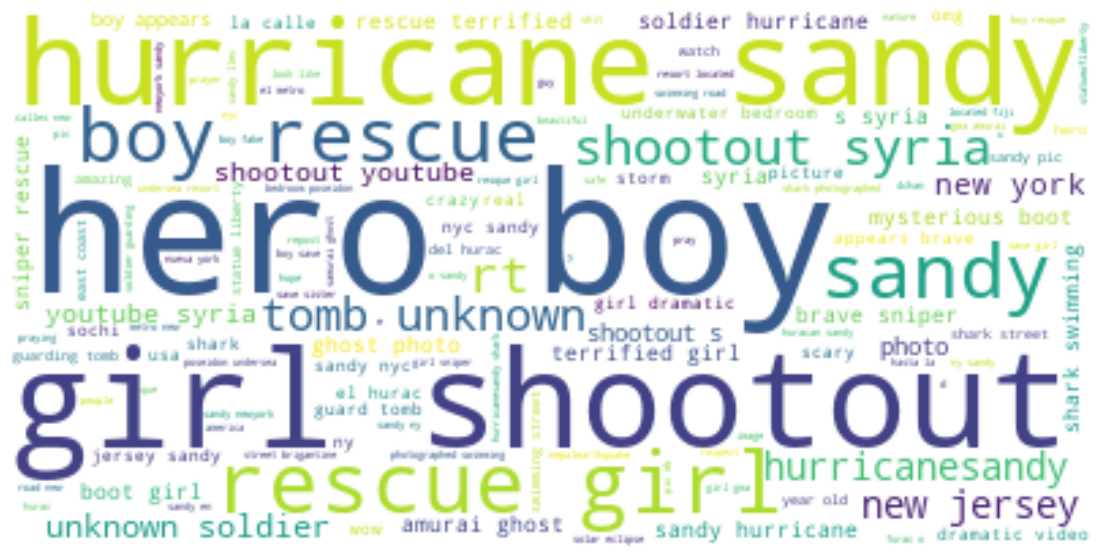

In [15]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=100000, 
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

text = ' '.join(' '.join(l) for l in df_preprocess_fake.tweet)

wc.generate(text)
wc.to_file("fake_wordcloud.png")
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

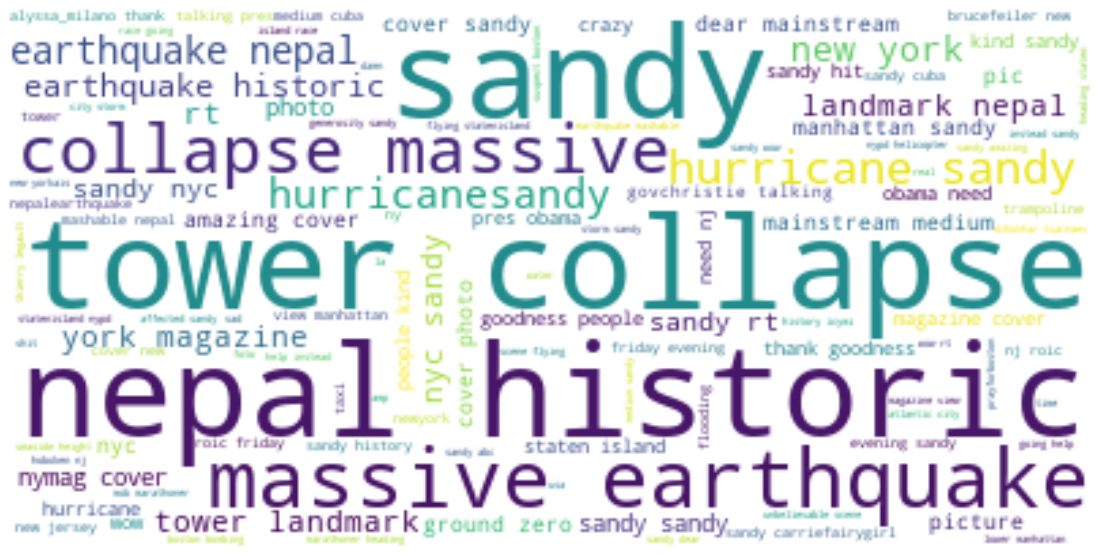

In [16]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=100000, 
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

text = ' '.join(' '.join(l) for l in df_preprocess_real.tweet)

wc.generate(text)
wc.to_file("real_wordcloud.png")
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# Getting the Polarity and Subjectivity of the sentiments of the real news 

df_real[['polarity', 'subjectivity']] = df_real['post_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

average_polarity_real_news = df_real['polarity'].mean()
print("Average polarity of real news:", average_polarity_real_news)

average_subjectivity_real_news = df_real['subjectivity'].mean()
print("Average subjectivity of real news:", average_subjectivity_real_news)

In [20]:
# Getting the Polarity and Subjectivity of the sentiments of the fake news 

df_fake[['polarity', 'subjectivity']] = df_fake['post_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

average_polarity_fake_news = df_fake['polarity'].mean()
print("average_polarity_fake_news", average_polarity_fake_news)

average_subjectivity_fake_news = df_fake['subjectivity'].mean()
print("average_subjectivity_fake_news", average_subjectivity_fake_news)